In [2]:
# Import pandas and numpy
import numpy as np 
import pandas as pd

# Import matplotlib for plotting and to specify that graphs should be plotted inline
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Import libraries to generate models
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [3]:
#Reading the dataset
df=pd.read_excel("911 Call Classification data 2.xlsx")

In [4]:
#Summary of the dataset
print(df.shape)
print(df.describe())
print(df.info())
df.head()

(1048575, 21)
           recordId                   callDateTime     timestamp  \
count  1.048575e+06                        1048575  1.048575e+06   
mean   5.242880e+05  2022-01-21 14:26:22.889349632  1.642775e+09   
min    1.000000e+00            2020-12-31 23:00:00  1.609456e+09   
25%    2.621445e+05            2021-07-15 08:58:30  1.626340e+09   
50%    5.242880e+05            2022-01-25 16:22:00  1.643128e+09   
75%    7.864315e+05            2022-07-21 16:05:00  1.658420e+09   
max    1.048575e+06            2023-02-01 23:30:00  1.675294e+09   
std    3.026977e+05                            NaN  1.874324e+07   

         PolicePost  CouncilDistrict       ZIPCode     NeedsSync  \
count  1.047557e+06     1.047605e+06  1.047077e+06  1.048575e+06   
mean   5.157490e+02     8.070009e+00  2.121717e+04  9.988356e-01   
min    1.110000e+02     1.000000e+00  2.120100e+04  0.000000e+00   
25%    3.110000e+02     5.000000e+00  2.121100e+04  1.000000e+00   
50%    5.130000e+02     9.000000e

,recordId,callKey,callDateTime,timestamp,priority,district,description,callNumber,incidentLocation,location,...,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,Census_Tracts,ZIPCode,NeedsSync,ESRI_OID,Column1
0,1,10CC9DA95FF34377,2021-01-04 10:33:00,1.609756e+09,Low,TRU,HIT AND RUN,P210041843,3500 AILSA AV,3500 AILSA AV BALTIMORE MD,...,Northeastern,426.0,2.0,D4,Lauraville,Census Tract 2701.02,21214.0,0,79,NaN
1,2,10CC9DA95FF3518A,2021-01-04 11:34:00,1.609760e+09,Medium,WD,NARCOTICS,P210042073,1700 N CALHOUN ST,1700 N CALHOUN ST BALTIMORE MD,...,Western,742.0,7.0,D9,Sandtown-Winchester/Harlem Park,Census Tract 1501,21217.0,0,80,NaN
2,3,10CC9DA95FF35312,2021-01-04 11:40:00,1.609760e+09,Low,CD,OTHER,P210042088,2000 DRUID HILL AV,2000 DRUID HILL AV BALTIMORE MD,...,Central,131.0,11.0,D8,Upton/Druid Heights,Census Tract 1403,21217.0,0,81,NaN
3,4,10CC9DA95FF3543D,2021-01-04 11:45:00,1.609761e+09,Medium,SD,NARCOTICS,P210042103,600 S PAYSON ST,600 S PAYSON ST BALTIMORE MD,...,Southern,934.0,9.0,D8,Southwest Baltimore,Census Tract 2003,21223.0,0,82,NaN
4,5,10CC9DA95FF4659A,2021-01-05 07:11:00,1.609831e+09,Low,TRU,DESTRUCT PROP,P210051288,3600 CHESTERFIELD AV,3600 CHESTERFIELD AV BALTIMORE MD,...,Northeastern,432.0,13.0,D6,Belair-Edison,Census Tract 2603.02,21213.0,0,83,NaN


In [5]:
# Convert 'callDateTime' column to datetime format
df['callDateTime'] = pd.to_datetime(df['callDateTime'])

# Extract day of the week and store it in a new column named 'day'
df['day'] = df['callDateTime'].dt.dayofweek

# Drop original 'callDateTime' column and 'Column1' and Census _tracts column
df.drop(columns=['callDateTime', 'Column1', 'Census_Tracts'], inplace=True)

In [6]:
df.head()

,recordId,callKey,timestamp,priority,district,description,callNumber,incidentLocation,location,Neighborhood,PoliceDistrict,PolicePost,CouncilDistrict,SheriffDistricts,Community_Statistical_Areas,ZIPCode,NeedsSync,ESRI_OID,day
0,1,10CC9DA95FF34377,1.609756e+09,Low,TRU,HIT AND RUN,P210041843,3500 AILSA AV,3500 AILSA AV BALTIMORE MD,Waltherson,Northeastern,426.0,2.0,D4,Lauraville,21214.0,0,79,0
1,2,10CC9DA95FF3518A,1.609760e+09,Medium,WD,NARCOTICS,P210042073,1700 N CALHOUN ST,1700 N CALHOUN ST BALTIMORE MD,Sandtown-Winchester,Western,742.0,7.0,D9,Sandtown-Winchester/Harlem Park,21217.0,0,80,0
2,3,10CC9DA95FF35312,1.609760e+09,Low,CD,OTHER,P210042088,2000 DRUID HILL AV,2000 DRUID HILL AV BALTIMORE MD,Druid Heights,Central,131.0,11.0,D8,Upton/Druid Heights,21217.0,0,81,0
3,4,10CC9DA95FF3543D,1.609761e+09,Medium,SD,NARCOTICS,P210042103,600 S PAYSON ST,600 S PAYSON ST BALTIMORE MD,Carrollton Ridge,Southern,934.0,9.0,D8,Southwest Baltimore,21223.0,0,82,0
4,5,10CC9DA95FF4659A,1.609831e+09,Low,TRU,DESTRUCT PROP,P210051288,3600 CHESTERFIELD AV,3600 CHESTERFIELD AV BALTIMORE MD,Belair-Edison,Northeastern,432.0,13.0,D6,Belair-Edison,21213.0,0,83,1


In [7]:
# Drop rows with missing values
df.dropna(inplace=True)

# Verify if there are any missing values after dropping
print(df.isnull().sum())

recordId                       0
callKey                        0
timestamp                      0
priority                       0
district                       0
description                    0
callNumber                     0
incidentLocation               0
location                       0
Neighborhood                   0
PoliceDistrict                 0
PolicePost                     0
CouncilDistrict                0
SheriffDistricts               0
Community_Statistical_Areas    0
ZIPCode                        0
NeedsSync                      0
ESRI_OID                       0
day                            0
dtype: int64


In [8]:
#Finding Unique Values in Priority Variable
df['priority'].unique()

array(['Low', 'Medium', 'Non-Emergency', 'High', 'Out of Service',
       'Emergency'], dtype=object)

In [9]:
#Making Priority a binary target variable
custom_mapping = {'Out of Service': 0, 'Non-Emergency': 0, 'Low': 0, 'Medium': 1, 'High': 1, 'Emergency': 1}
df['priority_ec'] = df['priority'].map(custom_mapping)
df.drop(columns=['priority'], inplace=True)

In [10]:
#Label Encoding to convert categorical variables to numerical variables
def label_encode_categoricals(df, categorical_columns):
   
    df_encoded = df.copy()
    label_encoder = LabelEncoder()
    for column in categorical_columns:
        df_encoded[column + '_ec'] = label_encoder.fit_transform(df[column])
    return df_encoded

categorical_columns = ['district', 'description', 'incidentLocation', 'location', 
                      'Neighborhood', 'PoliceDistrict', 'SheriffDistricts', 'Community_Statistical_Areas'] 
df_encoded = label_encode_categoricals(df, categorical_columns)

In [11]:
#Adding New encoded columns and dropping old categorical columns
df_encoded.drop(categorical_columns, axis=1, inplace=True)  # Drop original categorical columns
df_encoded.rename(columns={col + '_encoded': col for col in categorical_columns}, inplace=True)  # Rename encoded columns to original names

In [12]:
print(df_encoded.shape)
print(df_encoded.describe())
print(df_encoded.info())
df_encoded.head()

(1046316, 19)
           recordId     timestamp    PolicePost  CouncilDistrict  \
count  1.046316e+06  1.046316e+06  1.046316e+06     1.046316e+06   
mean   5.246175e+05  1.642767e+09  5.160161e+02     8.067425e+00   
std    3.025360e+05  1.874500e+07  2.652910e+02     3.868050e+00   
min    1.000000e+00  1.609456e+09  1.110000e+02     1.000000e+00   
25%    2.626358e+05  1.626328e+09  3.110000e+02     5.000000e+00   
50%    5.246625e+05  1.643113e+09  5.130000e+02     9.000000e+00   
75%    7.866162e+05  1.658427e+09  7.330000e+02     1.100000e+01   
max    1.048575e+06  1.675294e+09  9.430000e+02     1.400000e+01   

            ZIPCode     NeedsSync      ESRI_OID           day   priority_ec  \
count  1.046316e+06  1.046316e+06  1.046316e+06  1.046316e+06  1.046316e+06   
mean   2.121718e+04  9.988455e-01  4.689871e+05  2.991890e+00  4.758553e-01   
std    1.061909e+01  3.395873e-02  2.988144e+05  1.976955e+00  4.994169e-01   
min    2.120100e+04  0.000000e+00  2.700000e+01  0.000000

,recordId,callKey,timestamp,callNumber,PolicePost,CouncilDistrict,ZIPCode,NeedsSync,ESRI_OID,day,priority_ec,district_ec,description_ec,incidentLocation_ec,location_ec,Neighborhood_ec,PoliceDistrict_ec,SheriffDistricts_ec,Community_Statistical_Areas_ec
0,1,10CC9DA95FF34377,1.609756e+09,P210041843,426.0,2.0,21214.0,0,79,0,0,11,1520,15668,15668,254,2,4,30
1,2,10CC9DA95FF3518A,1.609760e+09,P210042073,742.0,7.0,21217.0,0,80,0,1,12,2021,6417,6417,229,8,9,46
2,3,10CC9DA95FF35312,1.609760e+09,P210042088,131.0,11.0,21217.0,0,81,0,0,0,2178,8608,8608,64,0,8,53
3,4,10CC9DA95FF3543D,1.609761e+09,P210042103,934.0,9.0,21223.0,0,82,0,1,7,2021,25059,25059,37,6,8,50
4,5,10CC9DA95FF4659A,1.609831e+09,P210051288,432.0,13.0,21213.0,0,83,1,0,11,938,16293,16293,11,2,6,2


In [13]:
#Converting Newly encoded categorical variables to object type
df_encoded["district_ec"] = df_encoded["district_ec"].astype(object)
df_encoded["description_ec"] = df_encoded["description_ec"].astype(object)
df_encoded["incidentLocation_ec"] = df_encoded["incidentLocation_ec"].astype(object)
df_encoded["location_ec"] = df_encoded["location_ec"].astype(object)
df_encoded["Neighborhood_ec"] = df_encoded["Neighborhood_ec"].astype(object)
df_encoded["PoliceDistrict_ec"] = df_encoded["PoliceDistrict_ec"].astype(object)
df_encoded["SheriffDistricts_ec"] = df_encoded["SheriffDistricts_ec"].astype(object)
df_encoded["Community_Statistical_Areas_ec"] = df_encoded["Community_Statistical_Areas_ec"].astype(object)

In [14]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1046316 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   recordId                        1046316 non-null  int64  
 1   callKey                         1046316 non-null  object 
 2   timestamp                       1046316 non-null  float64
 3   callNumber                      1046316 non-null  object 
 4   PolicePost                      1046316 non-null  float64
 5   CouncilDistrict                 1046316 non-null  float64
 6   ZIPCode                         1046316 non-null  float64
 7   NeedsSync                       1046316 non-null  int64  
 8   ESRI_OID                        1046316 non-null  int64  
 9   day                             1046316 non-null  int32  
 10  priority_ec                     1046316 non-null  int64  
 11  district_ec                     1046316 non-null  object 
 12  descr

In [15]:
#for models other than logistic regression i.e for knn and dt
df_sample = df_encoded.sample(n=50000)


In [16]:
#for KNN, we use the sample due to computational limitation
ytarget = df_sample['priority_ec']
xdata = df_sample[['PolicePost', 'CouncilDistrict', 'ZIPCode', 'day', 'district_ec','description_ec',"incidentLocation_ec","location_ec","Neighborhood_ec","PoliceDistrict_ec","SheriffDistricts_ec","Community_Statistical_Areas_ec"]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xdata, ytarget, test_size = 0.25,
                                                    random_state=4)

In [17]:
#Running KNN Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
# define function
#knn = KNeighborsClassifier( p = 1) # if manhattan distance required

knn = KNeighborsClassifier() 

# define a list of parameters
param_knn = {'n_neighbors': range(5, 50, 5) }  # exactly the same as the input variable name. 

# range(i,j): consecutive integers i to j exclude j 
# range(i, j, s): integers from i to j exclude j, increase by s. default s=1

#apply grid search
grid_knn = GridSearchCV(knn, param_knn, cv = 5)
grid_knn.fit(X_train, y_train)

# the best hyperparameter chosen:
print("1.", grid_knn.best_params_)

#test accuracy
print("2.", grid_knn.best_estimator_.score(X_test, y_test))

# When k=(best case), the validation score of through CV is:
print("3.", grid_knn.best_score_)

1. {'n_neighbors': 5}
2. 0.76048
3. 0.75656


In [18]:
#Confusion Matrix for KNN
# 1. Train the KNN classifier using the best parameters
best_knn = grid_knn.best_estimator_

# 2. Make predictions on the test data
y_pred_knn = best_knn.predict(X_test)

# 3. Compute the confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_knn)


Confusion Matrix:
[[4945 1589]
 [1405 4561]]


In [19]:
#TP, TN, FP, FN for KNN
print("TP is:", cm_knn[1,1])
print("TN is:", cm_knn[0,0])
print("FP is:", cm_knn[0,1])
print("FN is:", cm_knn[1,0])

TP is: 4561
TN is: 4945
FP is: 1589
FN is: 1405


In [20]:
#Accuracy, Precision, Recall and F1 Score for KNN
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
accuracy = accuracy_score(y_test,y_pred_knn)
precision = precision_score(y_test,y_pred_knn)
recall = recall_score(y_test,y_pred_knn)
f1 = f1_score(y_test,y_pred_knn)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.76048
Precision: 0.7416260162601626
Recall: 0.7644988266845457
F1 score: 0.7528887421591285


AUC for KNN: 0.8276124777473328


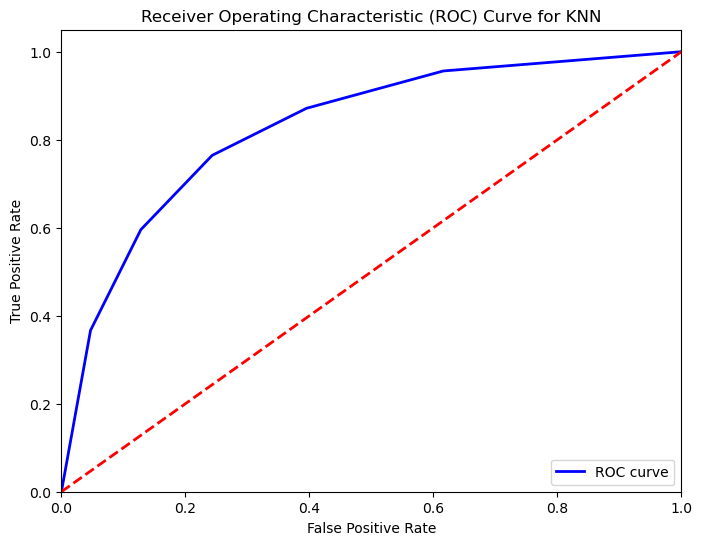

In [21]:
#Plotting ROC Curve for KNN
pred_prob_knn = best_knn.predict_proba(X_test)[:,1]
print("AUC for KNN:", roc_auc_score(y_test, pred_prob_knn))
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_knn)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc='lower right')
plt.show()

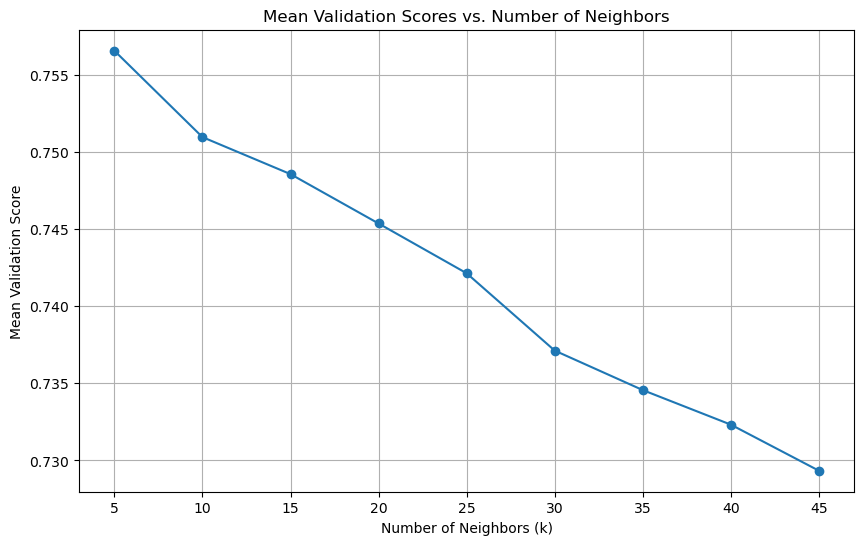

In [22]:
import matplotlib.pyplot as plt

# Extract the cross-validation results
cv_results = grid_knn.cv_results_

# Plot the mean validation scores against different values of n_neighbors
plt.figure(figsize=(10, 6))
plt.plot(param_knn['n_neighbors'], cv_results['mean_test_score'], marker='o', linestyle='-')
plt.title('Mean Validation Scores vs. Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Validation Score')
plt.xticks(param_knn['n_neighbors'])
plt.grid(True)
plt.show()

In [23]:
#for Logistic regression, we are able to use the full dataset
ytarget = df_encoded['priority_ec']
xdata = df_encoded[['PolicePost', 'CouncilDistrict', 'ZIPCode', 'day', 'district_ec','description_ec',"incidentLocation_ec","location_ec","Neighborhood_ec","PoliceDistrict_ec","SheriffDistricts_ec","Community_Statistical_Areas_ec"]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xdata, ytarget, test_size = 0.25,
                                                    random_state=4)

In [24]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
# Run the Logistic Regression Model: 
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
print(logreg.coef_)
print(logreg.intercept_)
y_test_lr=logreg.predict(X_test_scaled)



[[-3.04538053e-02 -5.10501900e-02 -3.28249134e-02  2.53887962e-02
  -7.14690383e-01  4.35227591e-03 -3.82167108e-02 -3.83090865e-02
   6.08309007e-04  6.80851080e-01 -2.58359802e-02 -7.34229335e-03]]
[-0.10749182]


In [26]:
print("Test Accuracy is:", logreg.score(X_test_scaled, y_test))

# Get it manually
y_test_pred = logreg.predict(X_test)
y_test == y_test_pred # true or false

# acc: # true/# total y test sample
acc_manual = np.sum(y_test == y_test_pred) / y_test.shape[0]
print(acc_manual)

Test Accuracy is: 0.529755829022972
0.5250880231211221


In [27]:
#Confusion Matric for Logistic Regression
from sklearn.metrics import confusion_matrix
my_matrix = confusion_matrix(y_test, y_test_lr)
my_matrix

array([[82237, 55115],
       [67891, 56336]], dtype=int64)

In [50]:
#TP, TN, FP, FN for Logistic Regression
print("TP is:", my_matrix[1,1])
print("TN is:", my_matrix[0,0])
print("FP is:", my_matrix[0,1])
print("FN is:", my_matrix[1,0])

TP is: 56336
TN is: 82237
FP is: 55115
FN is: 67891


In [28]:
#Accuracy, Precision, Recall and F1 Score for LR
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
accuracy = accuracy_score(y_test,y_test_lr)
precision = precision_score(y_test,y_test_lr)
recall = recall_score(y_test,y_test_lr)
f1 = f1_score(y_test,y_test_lr)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.529755829022972
Precision: 0.5054777435823815
Recall: 0.4534923969829425
F1 score: 0.4780760189750422


In [29]:
#Coefficients Info for LR
coefficients = logreg.coef_[0]
feature_names=xdata.columns
# Create a dictionary mapping feature names to coefficients
feature_coefficient_map = dict(zip(feature_names, coefficients))

# Sort the features by their coefficient values (absolute values for magnitude)
sorted_features = sorted(feature_coefficient_map.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the feature names along with their coefficients
for feature, coefficient in sorted_features:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Feature: district_ec, Coefficient: -0.7146903830307598
Feature: PoliceDistrict_ec, Coefficient: 0.6808510803790543
Feature: CouncilDistrict, Coefficient: -0.05105019001084004
Feature: location_ec, Coefficient: -0.03830908646052868
Feature: incidentLocation_ec, Coefficient: -0.038216710778333
Feature: ZIPCode, Coefficient: -0.032824913355115434
Feature: PolicePost, Coefficient: -0.030453805256335092
Feature: SheriffDistricts_ec, Coefficient: -0.02583598024636783
Feature: day, Coefficient: 0.025388796218831555
Feature: Community_Statistical_Areas_ec, Coefficient: -0.007342293349588153
Feature: description_ec, Coefficient: 0.004352275906714283
Feature: Neighborhood_ec, Coefficient: 0.000608309006731491


AUC for Logistic Regression: 0.557456400426249


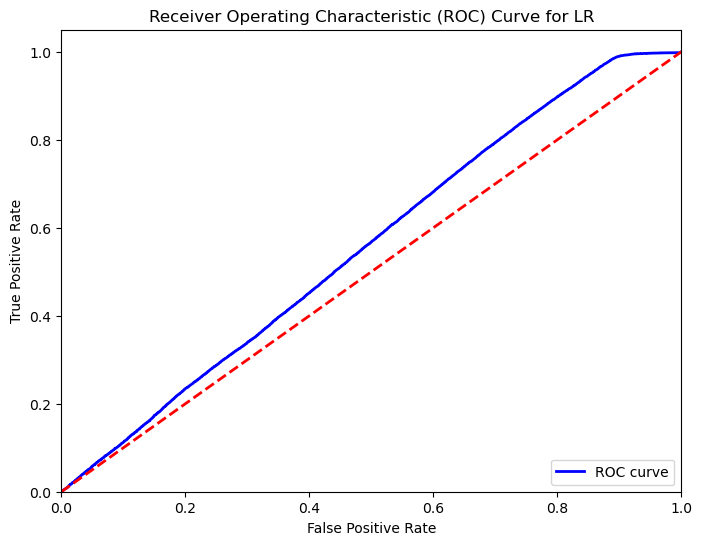

In [30]:
#Plotting ROC Curve for LR
pred_prob_lr = logreg.predict_proba(X_test_scaled)[:,1]
print("AUC for Logistic Regression:", roc_auc_score(y_test, pred_prob_lr))
fpr, tpr, thresholds = roc_curve(y_test, pred_prob_lr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LR')
plt.legend(loc='lower right')
plt.show()

In [31]:
#for DT, we use the sample due to computational limitation
ytarget = df_sample['priority_ec']
xdata = df_sample[['timestamp', 'PolicePost', 'CouncilDistrict', 'ZIPCode', 'day', 'district_ec','description_ec',"incidentLocation_ec","location_ec","Neighborhood_ec","PoliceDistrict_ec","SheriffDistricts_ec","Community_Statistical_Areas_ec"]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xdata, ytarget, test_size = 0.25,
                                                    random_state=4)

In [32]:
#Running Decision Tree Classifier
# GridSearch + CV
opt_tree = DecisionTreeClassifier(random_state = 0) 

dt_params = {'max_depth':  range(1,21)         ,
              'min_samples_split':   range(2,11), 
             'max_leaf_nodes':    range(2,10)  }

grid_tree = GridSearchCV(opt_tree, dt_params)
grid_tree.fit(X_train, y_train)
# Report the best hyperparameters chosen
print("1.", grid_tree.best_params_)
print("2.", grid_tree.best_estimator_.score(X_test, y_test))
print("3.", grid_tree.best_score_)


1. {'max_depth': 5, 'max_leaf_nodes': 9, 'min_samples_split': 2}
2. 0.85032
3. 0.8532533333333333


In [33]:
y_pred_dt = grid_tree.predict(X_test)

In [37]:
#Confusion Matrix for Decision tree
my_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("TP is:", my_matrix_dt[1,1])
print("TN is:", my_matrix_dt[0,0])
print("FP is:", my_matrix_dt[0,1])
print("FN is:", my_matrix_dt[1,0])
my_matrix_dt

TP is: 5467
TN is: 5162
FP is: 1372
FN is: 499


array([[5162, 1372],
       [ 499, 5467]], dtype=int64)

In [35]:
#Accuracy, Precision, Recall and F1 Score for DT
accuracy = accuracy_score(y_test,y_pred_dt)
precision = precision_score(y_test,y_pred_dt)
recall = recall_score(y_test,y_pred_dt)
f1 = f1_score(y_test,y_pred_dt)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.85032
Precision: 0.7993858751279427
Recall: 0.9163593697619846
F1 score: 0.8538852010933229


AUC for Decision Tree: 0.9146295388181226


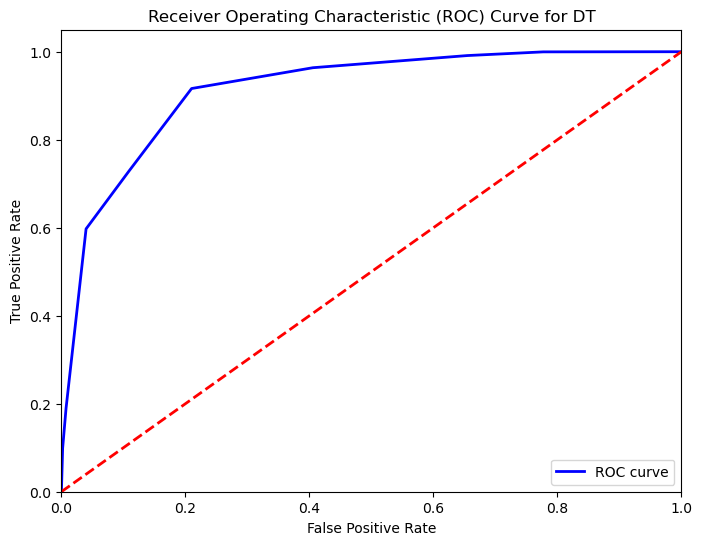

In [36]:
#Plotting ROC Curve for Decision Tree
pred_prob = grid_tree.predict_proba(X_test)[:,1]
print("AUC for Decision Tree:", roc_auc_score(y_test, pred_prob))
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for DT')
plt.legend(loc='lower right')
plt.show()

In [38]:
print(tree.export_text(grid_tree.best_estimator_))

|--- feature_6 <= 133.50
|   |--- class: 0
|--- feature_6 >  133.50
|   |--- feature_6 <= 1318.00
|   |   |--- feature_6 <= 1036.50
|   |   |   |--- feature_6 <= 377.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  377.50
|   |   |   |   |--- feature_6 <= 411.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  411.00
|   |   |   |   |   |--- class: 1
|   |   |--- feature_6 >  1036.50
|   |   |   |--- class: 1
|   |--- feature_6 >  1318.00
|   |   |--- feature_6 <= 2005.00
|   |   |   |--- class: 0
|   |   |--- feature_6 >  2005.00
|   |   |   |--- feature_6 <= 2109.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_6 >  2109.00
|   |   |   |   |--- feature_6 <= 2745.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_6 >  2745.00
|   |   |   |   |   |--- class: 1



In [43]:
#for RFC, we are able to use the full dataset
ytarget = df_encoded['priority_ec']
xdata = df_encoded[['PolicePost', 'CouncilDistrict', 'ZIPCode', 'day', 'district_ec','description_ec',"incidentLocation_ec","location_ec","Neighborhood_ec","PoliceDistrict_ec","SheriffDistricts_ec","Community_Statistical_Areas_ec"]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xdata, ytarget, test_size = 0.25,
                                                    random_state=4)

In [44]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 500, max_samples = 20000, bootstrap=True, random_state = 42)
# estimator dropped, estimator will be tree
rf.fit(X_train, y_train)
rf.score(X_test, y_test), rf.feature_importances_
pred_prob = rf.predict_proba(X_test)[:,1]


In [45]:
y_pred_rf = rf.predict(X_test)
my_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("TP is:", my_matrix_rf[1,1])
print("TN is:", my_matrix_rf[0,0])
print("FP is:", my_matrix_rf[0,1])
print("FN is:", my_matrix_rf[1,0])

#Accuracy, Precision, Recall and F1 Score for RFC
accuracy = accuracy_score(y_test,y_pred_rf)
precision = precision_score(y_test,y_pred_rf)
recall = recall_score(y_test,y_pred_rf)
f1 = f1_score(y_test,y_pred_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

TP is: 111867
TN is: 127662
FP is: 9690
FN is: 12360
Accuracy: 0.9157042423130297
Precision: 0.9202843110639453
Recall: 0.9005047211958753
F1 score: 0.9102870813397129


In [47]:
my_matrix_rfc = confusion_matrix(y_test, y_pred_rf)
my_matrix_rfc

array([[127662,   9690],
       [ 12360, 111867]], dtype=int64)

AUC for RFC: 0.9663171239013584


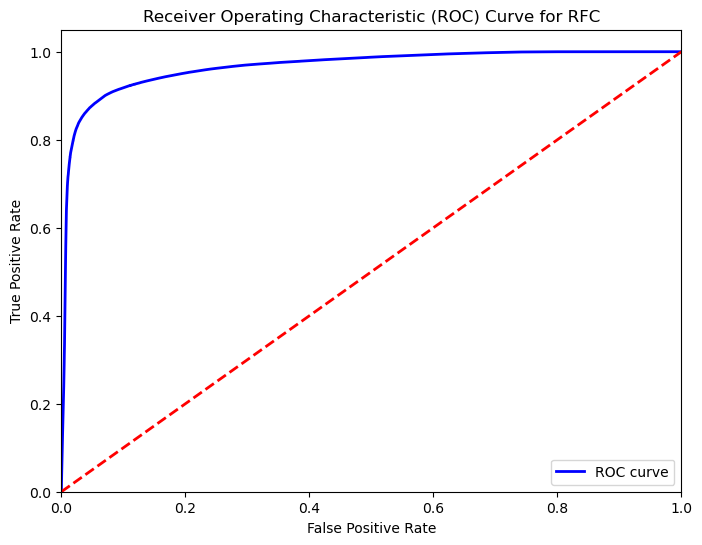

In [48]:
#Plotting ROC Curve for RandomForest Classifier
fpr, tpr, thresholds = roc_curve(y_test, pred_prob)
print("AUC for RFC:", roc_auc_score(y_test, pred_prob))
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for RFC')
plt.legend(loc='lower right')
plt.show()

In [49]:
#for SVC, we use the sample due to computational limitation
#for models other than logistic regression i.e for knn and dt
df_sample = df_encoded.sample(n=20000)

ytarget = df_sample['priority_ec']
xdata = df_sample[['timestamp', 'PolicePost', 'CouncilDistrict', 'ZIPCode', 'day', 'district_ec','description_ec',"incidentLocation_ec","location_ec","Neighborhood_ec","PoliceDistrict_ec","SheriffDistricts_ec","Community_Statistical_Areas_ec"]]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xdata, ytarget, test_size = 0.25,
                                                    random_state=4)

In [50]:
#Running SVC Model

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='auto')
svm_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svc = svm_model.predict(X_test_scaled)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred_svc)
svm_model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.67376


In [51]:
#Confusion Matrix for SVC
my_matrix_svc = confusion_matrix(y_test, y_pred_svc)
print("TP is:", my_matrix_svc[1,1])
print("TN is:", my_matrix_svc[0,0])
print("FP is:", my_matrix_svc[0,1])
print("FN is:", my_matrix_svc[1,0])
my_matrix_svc

TP is: 3931
TN is: 4491
FP is: 2043
FN is: 2035


array([[4491, 2043],
       [2035, 3931]], dtype=int64)

In [52]:
#Accuracy, Precision, Recall and F1 Score for SVC
accuracy = accuracy_score(y_test,y_pred_svc)
precision = precision_score(y_test,y_pred_svc)
recall = recall_score(y_test,y_pred_svc)
f1 = f1_score(y_test,y_pred_svc)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.67376
Precision: 0.658018078339471
Recall: 0.658900435802883
F1 score: 0.6584589614740369


AUC for SVC: 0.7495837292868957


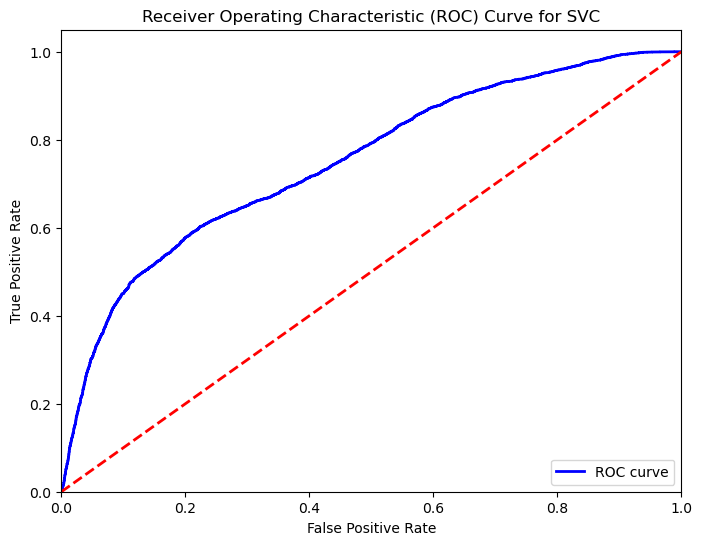

In [53]:
#Plotting ROC Curve for SVC
decision_scores = svm_model.decision_function(X_test_scaled)
print("AUC for SVC:", roc_auc_score(y_test, decision_scores))
fpr, tpr, thresholds = roc_curve(y_test, decision_scores)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVC')
plt.legend(loc='lower right')
plt.show()